In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

!mkdir ~/.kaggle/
# Get kaggle.json
!cp "kaggle.json" "/root/.kaggle/kaggle.json"
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c spaceship-titanic

In [10]:
!unzip spaceship-titanic.zip >&NULL
!rm NULL

In [433]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_len=len(train_df)
train_test_df=pd.concat([train_df,test_df],axis=0)
train_test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [434]:
def correct_cryo_sleep(df):
    df['CryoSleep'] = np.where((df['CryoSleep'].isnull()) & (df['RoomService']==0) & (df['FoodCourt']==0 )
                & (df['ShoppingMall']==0) & (df['Spa']==0) & (df['VRDeck']==0),True,df['CryoSleep'])
    df['CryoSleep'] = np.where(df['CryoSleep'].isnull() & ((df['RoomService']>0) | (df['FoodCourt']>0 )
                | (df['ShoppingMall']>0) | (df['Spa']>0) | (df['VRDeck']>0)),False,df['CryoSleep'])
    return df
def correct_amenity_values(df):
    amenity_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for service in amenity_cols:
        df[service] = np.where(df[service].isnull() & (df['CryoSleep']==True),0.0,df[service])
        df[service]=df[service].fillna(0.0)
    return df
correct_cryo_sleep(train_test_df)
correct_amenity_values(train_test_df)
# train_test_df.isna().sum()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [435]:
# # for unknown luxury expenses lets assume they are zero
# train_test_df['RoomService'].fillna(0,inplace=True)
# train_test_df['FoodCourt'].fillna(0,inplace=True)
# train_test_df['ShoppingMall'].fillna(0,inplace=True)
# train_test_df['Spa'].fillna(0,inplace=True)
# train_test_df['VRDeck'].fillna(0,inplace=True)

train_test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [436]:
# for the people we don't know if they are in cryo sleep or not lets assume there are not in cryo sleep
train_test_df['CryoSleep'].fillna(False,inplace=True)

# for the people we don't know if they are VIP or not lets assume there are not VIP
train_test_df['VIP'].fillna(False,inplace=True)

train_test_df[['CryoSleep','VIP']].isna().sum()

CryoSleep    0
VIP          0
dtype: int64

In [437]:
train_test_df["Destination"].nunique(),train_test_df["Destination"].unique()

(3, array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object))

In [438]:
train_test_df[["Destination"]].describe()

,Destination
count,12696
unique,3
top,TRAPPIST-1e
freq,8871


In [439]:
# let the unknown age be age from the middle
train_test_df['Age'].fillna(train_test_df['Age'].median(),inplace=True)
# we used the mode as these people are probably going to the same where most people are going to
train_test_df['Destination'].fillna(train_test_df['Destination'].mode()[0],inplace=True)
train_test_df["HomePlanet"].fillna(train_test_df['HomePlanet'].mode()[0],inplace=True)
train_test_df[['Age','Destination','HomePlanet']].isna().sum()

Age            0
Destination    0
HomePlanet     0
dtype: int64

In [440]:
# for nan in Cabin Unknown deck/0/Unknown side
train_test_df['Cabin'].fillna("U/0/U",inplace=True)
train_test_df[['Cabin']].isna().sum()

Cabin    0
dtype: int64

In [441]:
# name = last name and for nan ,name = unknown
train_test_df['Name']=train_test_df['Name'].map(lambda x: x.split(' ',1)[1] if pd.notnull(x) else 'unknown')
train_test_df[['Name']].isna().sum()

Name    0
dtype: int64

In [442]:
train_test_df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported     4277
dtype: int64

# Feature Engineering

In [443]:
# passenger id = passenger group
train_test_df['PassengerId']=train_test_df['PassengerId'].map(lambda x:x.split('_',1)[0])

In [445]:
train_test_df['deck']=train_test_df['Cabin'].map(lambda x: x.split('/')[0])
train_test_df['room_num']=train_test_df['Cabin'].map(lambda x: x.split('/')[1])
train_test_df['room_num'] = train_test_df['room_num']
train_test_df['room_side']=train_test_df['Cabin'].map(lambda x: x.split('/')[2])

train_test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,room_num,room_side
0,0001,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Ofracculy,False,B,0,P
1,0002,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Vines,True,F,0,S
2,0003,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Susent,False,A,0,S
3,0003,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Susent,False,A,0,S
4,0004,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Peter,NaN,G,1496,S
4273,9269,Earth,False,U/0/U,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Scheron,NaN,U,0,U
4274,9271,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Pore,NaN,D,296,P
4275,9273,Europa,False,D/297/P,TRAPPIST-1e,27.0,False,0.0,2680.0,0.0,0.0,523.0,Conale,NaN,D,297,P


In [446]:
# creating isAlone feature
upids=list(train_test_df['PassengerId'].unique())
upid_dict={upid:0 for upid in upids}
for upid in upid_dict.keys():
  upid_dict[upid]=(train_test_df['PassengerId']==upid).sum()

isAlone=[]
for pid in train_test_df['PassengerId']:
  # group_size=(train_test_df['PassengerId']==pid).sum()
  group_size=upid_dict[pid]
  if group_size==1:
    isAlone.append(True)
  else:
    isAlone.append(False)
    # print(group_size)
train_test_df['isAlone']=isAlone

In [447]:
amenity_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_test_df ['Spending'] = train_test_df[amenity_cols].sum(axis=1)>0

In [448]:
def convert_to_dummies(df):
    df = pd.get_dummies(df, columns=['Destination'], prefix="D")
    df = pd.get_dummies(df, columns=['HomePlanet'], prefix="H")
    df = pd.get_dummies(df, columns=['room_side'])
    df = pd.get_dummies(df, columns=['VIP'])
    df = pd.get_dummies(df, columns=['CryoSleep'])
    df = pd.get_dummies(df, columns=['deck'])
    # df = pd.get_dummies(df, columns=['isAlone'])
    # df = pd.get_dummies(df, columns=['Spending'])
#     df = pd.get_dummies(df, columns=['Name'])
  
    return df
# train_test_df=convert_to_dummies(train_test_df)

In [449]:
# train_test_df.drop(['Cabin','isAlone','Name','Spending'],inplace=True,axis=1)
# train_test_df.drop(['Cabin','Name'],inplace=True,axis=1)
train_test_df.drop(['Cabin'],inplace=True,axis=1)

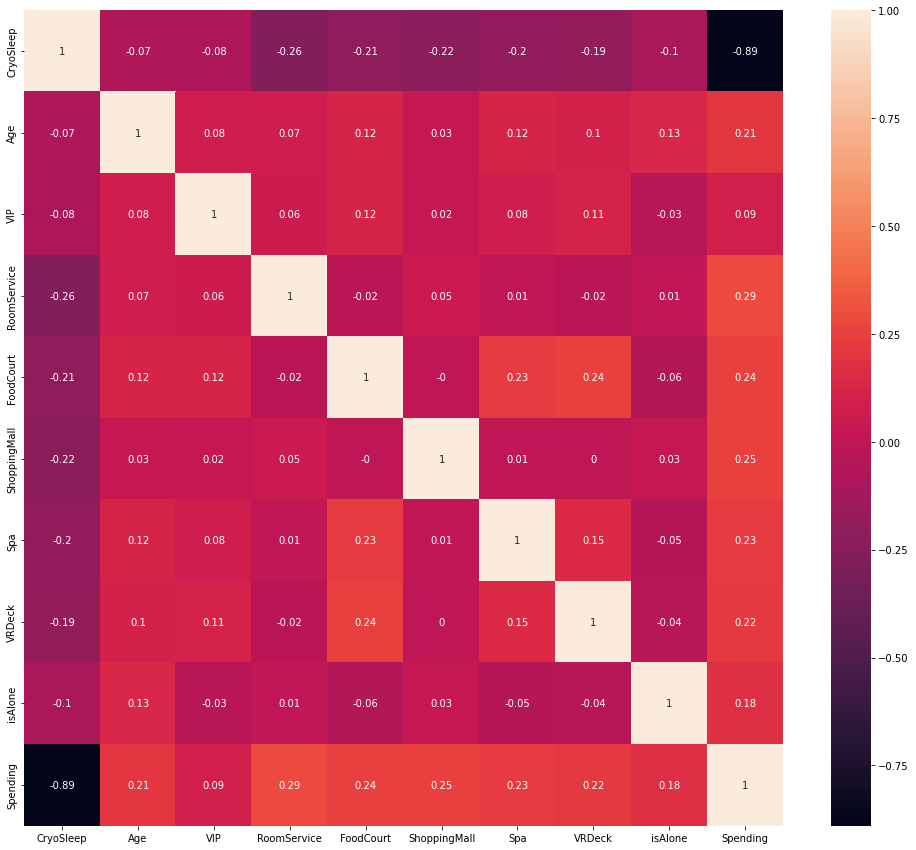

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt


matrix = train_test_df.corr().round(2)
plt.figure(figsize=(17,15))
sns.heatmap(matrix, annot=True)
plt.show()

In [451]:
train_df=train_test_df[:train_len]
test_df=train_test_df[train_len:]
test_df=test_df.drop('Transported',axis=1)

# train_df=train_df.drop(['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)
# test_df=test_df.drop(['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

In [452]:
from fastai.tabular.all import *

In [453]:
dep_var = 'Transported'
# categorical_cols=['PassengerId','HomePlanet','CryoSleep','Destination','VIP','Name','deck','room_num','room_side']
# cont_cols = ['Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
cont_cols, categorical_cols = cont_cat_split(train_df, dep_var=dep_var)
# cont_cols = ['Age']
procs = [Categorify, Normalize]
categorical_cols

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Name',
 'deck',
 'room_num',
 'room_side',
 'isAlone',
 'Spending']

In [454]:
dls=TabularDataLoaders.from_df(train_df,
                               procs=procs,
                               cat_names=categorical_cols,
                               cont_names=cont_cols,
                               y_names=dep_var, 
                               y_block=CategoryBlock(),
                               splits=RandomSplitter(valid_pct=0.2)(train_df),
                               bs=64)

In [455]:
dls.show_batch()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Name,deck,room_num,room_side,isAlone,Spending,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2506,Earth,False,55 Cancri e,False,Apenelexy,A,19,P,False,True,38.0,0.000003,2506.000115,46.000004,11001.000334,5.000001,False
1,8673,Europa,True,TRAPPIST-1e,False,Pentical,C,285,P,True,False,27.0,0.000003,-0.000004,-0.000003,0.000015,-0.000008,True
2,2865,Mars,False,TRAPPIST-1e,False,Corie,D,88,P,False,True,34.0,2904.000079,23.000001,7.000007,0.000015,81.000005,False
3,6921,Europa,True,55 Cancri e,False,Fordulgaug,C,255,S,False,False,24.0,0.000003,-0.000004,-0.000003,0.000015,-0.000008,True
4,3488,Europa,False,TRAPPIST-1e,False,Hoorbaring,D,110,P,False,False,26.0,0.000003,-0.000004,-0.000003,0.000015,-0.000008,False
5,6865,Europa,True,TRAPPIST-1e,False,Peducting,D,208,S,False,False,32.0,0.000003,-0.000004,-0.000003,0.000015,-0.000008,True
6,7483,Mars,False,PSO J318.5-22,False,Winie,E,485,P,True,True,43.0,244.000001,-0.000004,358.000002,159.999997,799.999997,True
7,8209,Earth,False,TRAPPIST-1e,False,Mirandry,G,1332,P,True,True,57.0,5.999992,509.999998,372.000005,0.000015,-0.000008,True
8,3218,Earth,False,55 Cancri e,False,Bardinard,F,606,S,False,True,58.0,51.999991,-0.000004,5.000004,516.999992,-0.000008,False
9,4020,Europa,False,55 Cancri e,False,unknown,B,126,P,True,True,37.0,6498.000104,1470.000017,-0.000003,415.999998,4174.000152,False


In [456]:
len(dls.train), len(dls.valid)
# dls.one_batch()

(108, 28)

In [457]:
# my_config = tabular_config(y_range=(0,1), use_bn=True, ps=0.1, embed_p=0.1)
# learn = tabular_learner(dls,layers=[200,100],metrics=accuracy,config=my_config)

In [458]:
save_callback=SaveModelCallback(fname='best_model',monitor='accuracy',reset_on_fit=False,with_opt=True)
for _ in range(5):
    my_config = tabular_config(y_range=(0,1), use_bn=True, ps=0.1, embed_p=0.1)
    learn = tabular_learner(dls,layers=[200,100],metrics=accuracy,config=my_config)
    learn.fit_one_cycle(1,1e-3,wd=0.01,cbs=save_callback)

epoch,train_loss,valid_loss,accuracy,time
0,0.529537,0.519532,0.781358,00:04


Better model found at epoch 0 with accuracy value: 0.7813578844070435.


epoch,train_loss,valid_loss,accuracy,time
0,0.533576,0.518364,0.780207,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.534394,0.519580,0.783659,00:04


Better model found at epoch 0 with accuracy value: 0.7836593985557556.


epoch,train_loss,valid_loss,accuracy,time
0,0.535259,0.523013,0.781358,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.534224,0.519377,0.787112,00:04


Better model found at epoch 0 with accuracy value: 0.7871116399765015.


In [397]:
# learn.fit(1,1e-3,wd=0.01)

In [398]:
# learn.fit_one_cycle(20,1e-3,wd=0.01)

In [354]:
# learn.load("best_model")

In [459]:
learn.validate()

(#2) [0.5193769931793213,0.7871116399765015]

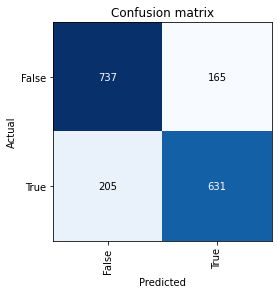

In [460]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [461]:
# learn.fit_one_cycle(1,1e-3)

In [358]:
# learn.fit_one_cycle(5,1e-2)

In [ ]:
categorical_cols
# learn.show_results()
#dlt = learn.dls.test_dl(test_df) 
# learn.predict(test_df[:1])

In [360]:
# train_test_df

In [361]:
# ((train_test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]!=0).sum(axis=1)>0) # was awake

In [362]:
# train_test_df['CryoSleep']

In [462]:
test_dl = learn.dls.test_dl(test_df) 
test_preds=learn.get_preds(dl=test_dl)[0]
test_preds=test_preds.numpy().argmax(axis=-1)==1

In [463]:
test_pids=np.array(pd.read_csv('test.csv')['PassengerId'])
pd.DataFrame({"PassengerId":test_pids,"Transported":test_preds}).to_csv('submission.csv',index=False)

In [464]:
pd.read_csv('submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [366]:
!kaggle competitions submit -c spaceship-titanic -f submission.csv -m "without_getting_pd.dummies"

100% 56.4k/56.4k [00:03<00:00, 14.9kB/s]
Successfully submitted to Spaceship Titanic

In [ ]:
# train_test_df[cont_cols]